In [1]:
import math
from pyquaternion import Quaternion
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [77]:
# np.random.seed(0)
angle = math.pi/64
range_mm = 5

p_outliers = 0.05
rnd = np.random.randn(10, 10000, 6)
# creating the randomization for the p outliers
n_outliers = int(np.ceil(p_outliers*rnd.shape[1]))
rnd_uniform = np.random.rand(rnd.shape[0], n_outliers, 6)

# gaussian sampling for little angles : sampling in tangent around space unit quaternion exponential
# https://math.stackexchange.com/questions/473736/small-angular-displacements-with-a-quaternion-representation

# p of the samples (outliers) will be over angle range, multiplied by a factor to correct the asymetry
sigma_outliers = stats.norm.ppf(1-p_outliers/2)
sigma = (angle / sigma_outliers) * 0.615

R = np.zeros((rnd.shape[0], rnd.shape[1], 3))
R = rnd[:, :, :3] * sigma
theta = np.linalg.norm(R, axis=2)
theta = theta/2
Q = np.zeros((rnd.shape[0], rnd.shape[1], 4))
Q[:,:,0] = np.cos(theta)
Q[:,:,1::] = R * np.dstack([(1/theta)*np.sin(theta)]*3)

# randomly sampling p outliers quaternions using uniform law
# http://planning.cs.uiuc.edu/node198.html
R_uniform = np.zeros((rnd_uniform.shape[0], rnd_uniform.shape[1], 3))
R_uniform = rnd_uniform[:, :, :3]
Q_uniform = np.zeros((rnd_uniform.shape[0], rnd_uniform.shape[1], 4))
Q_uniform = np.dstack(( np.sqrt(1.0 - R_uniform[:,:,0]) * (np.sin(2 * math.pi * R_uniform[:,:,1]))
                      , np.sqrt(1.0 - R_uniform[:,:,0]) * (np.cos(2 * math.pi * R_uniform[:,:,1]))
                      , np.sqrt(R_uniform[:,:,0])       * (np.sin(2 * math.pi * R_uniform[:,:,2]))
                      , np.sqrt(R_uniform[:,:,0])       * (np.cos(2 * math.pi * R_uniform[:,:,2])) ))

# now we can replace the outliers on the original quaternion matrix Q
angles = 2*np.arccos(Q[:,:,0])
logic = np.zeros((10,10000), dtype=bool)        
logic_Q = np.argsort(angles, axis=1)[:,-rnd_uniform.shape[1]:]
for ii in range(logic_Q.shape[0]):
    logic[ii,:] = np.isin(range(rnd.shape[1]), logic_Q[ii, :])
logic = np.dstack([logic]*4)  
Q[logic] = Q_uniform.flatten()

351.37426751774774
mean 10.224768
percentile 95% 2.719488


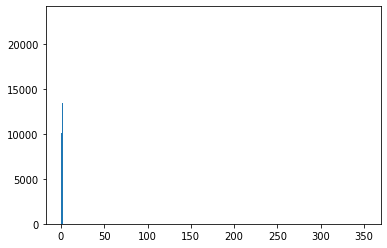

In [78]:
angles = 2*np.arccos(Q[:,:,0])
print(np.max(angles*180/math.pi))
print("mean %f" %(np.mean(angles.flatten())*180/math.pi))
print("percentile 95%% %f" %np.percentile(angles.flatten()*180/math.pi, 95))
plt.hist(angles.flatten()*180/math.pi, 1000)
plt.show()

In [ ]:
np.max(angles*180/math.pi)

In [ ]:
i = np.random.randint(10)
j = np.random.randint(10000)
q = Quaternion([h1[i,j], h2[i,j], h3[i,j], h4[i,j]])
print(np.array(q.yaw_pitch_roll) * 180/np.pi)
angles = 2*np.arccos(h1)
print(angles[i,j] * 180/np.pi)

In [ ]:
t = 2*np.arccos(h1) * 180/np.pi
print("%d valid under 45deg" %np.sum(t>45))

In [ ]:
def q_rotate(q, rad):
    rad = np.abs(rad)
    theta = 2 * np.arccos(q[0])
    vec = q[1::]/np.sin(theta/2)
    # we want to rotate the same quaternion
    vec = -vec
    q1 = np.array([np.cos(rad/2)
         , vec[0]*np.sin(rad/2)
         , vec[1]*np.sin(rad/2)
         , vec[2]*np.sin(rad/2)])
    q2 = q_multiply(q,q1)
    return q2

def q_multiply(q0, q1):
    w0, x0, y0, z0 = q0
    w1, x1, y1, z1 = q1
    q = [-x1 * x0 - y1 * y0 - z1 * z0 + w1 * w0
          , x1 * w0 + y1 * z0 - z1 * y0 + w1 * x0
          , -x1 * z0 + y1 * w0 + z1 * x0 + w1 * y0
          ,  x1 * y0 - y1 * x0 + z1 * w0 + w1 * z0]
    return q

In [ ]:
alpha = np.pi/2
q = [np.cos(alpha/2), 1*np.sin(alpha/2), 0*np.sin(alpha/2), 0*np.sin(alpha/2)]
print("original " + str(q))
print( "angle %f" %(2 * np.arccos(q[0])* 180/np.pi))

q_res = q_rotate(q, np.pi/2)
print( "results " + str(q_res))
print( "angle %f" %(2 * np.arccos(q_res[0])* 180/np.pi))



In [ ]:
x = np.random.randn(3)
theta = np.linalg.norm(x)
q_exp=[np.cos(theta/2)
       , (1/theta)*np.sin(theta/2)*x[0]
       , (1/theta)*np.sin(theta/2)*x[1]
       , (1/theta)*np.sin(theta/2)*x[2] ]
print(x*(1/theta))
print( "results " + str(q_exp))
print( "angle %f" %(2 * np.arccos(q_exp[0])* 180/np.pi))

In [ ]:
[np.cos(np.pi/2), vec*np.sin(np.pi/2)]

In [ ]:
list([np.cos(np.pi/2), vec*np.sin(np.pi/2)])